In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timezone

from math import cos, radians

In [2]:
def plot_TMA():
    
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    
    TMA_lon=[18.2130555555556, 18.5547222222222, 18.8469444444444, 19.3136111111111, 19.8280555555556, 19.2736111111111,
          18.9683333333333, 18.7547222222222, 18.5394444444444, 18.4572222222222, 17.9327777777778, 17.4569444444444,
          17.4077777777778, 17.2233333333333, 16.7077777777778, 16.2677777777778, 16.3183333333333, 16.4466666666667,
          17.5966666666667, 18.2130555555556];

    TMA_lat=[60.2994444444444, 60.2661111111111, 59.8827777777778, 60.0352777777778, 59.6736111111111, 59.5994444444444,
          59.255, 59.0419444444444, 58.8325, 58.7525, 58.5830555555556, 58.6163888888889, 58.9661111111111,
          58.9786111111111, 59.0119444444444, 59.0494444444444, 59.3238888888889, 59.7494444444444, 60.2327777777778,
          60.2994444444444];

    number_of_rwys = 4

    rwy1_lon=[17.9361345, 17.9791531944444];
    rwy1_lat=[59.6584189166667, 59.6638971944444 ];

    rwy2_lon=[17.9132249722222, 17.9237679722222];
    rwy2_lat=[59.637256, 59.6664016944444 ];

    rwy3_lon=[17.9507426111111, 17.9587480555556];
    rwy3_lat=[59.6263963888889, 59.6484673055556];

    central_latitude = min(TMA_lat) + (max(TMA_lat)-min(TMA_lat))/2
        
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_latitude))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)
 
    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)

    
    plt.plot(TMA_lon, TMA_lat, color="blue")
    plt.plot(rwy1_lon,rwy1_lat, color="red")
    plt.plot(rwy2_lon,rwy2_lat, color="red")
    plt.plot(rwy3_lon,rwy3_lat, color="red")
    
    ELTOK_lon = 16.6503
    ELTOK_lat = 59.5861
    HMR_lon = 18.3917
    HMR_lat = 60.2794
    XILAN_lon = 19.0761
    XILAN_lat = 59.6594
    NILUG_lon = 17.8847
    NILUG_lat = 58.8158

    plt.plot(HMR_lon, HMR_lat, 'ro')
    plt.plot(NILUG_lon, NILUG_lat, 'ro')
    plt.plot(XILAN_lon, XILAN_lat, 'ro')
    plt.plot(ELTOK_lon, ELTOK_lat, 'ro')

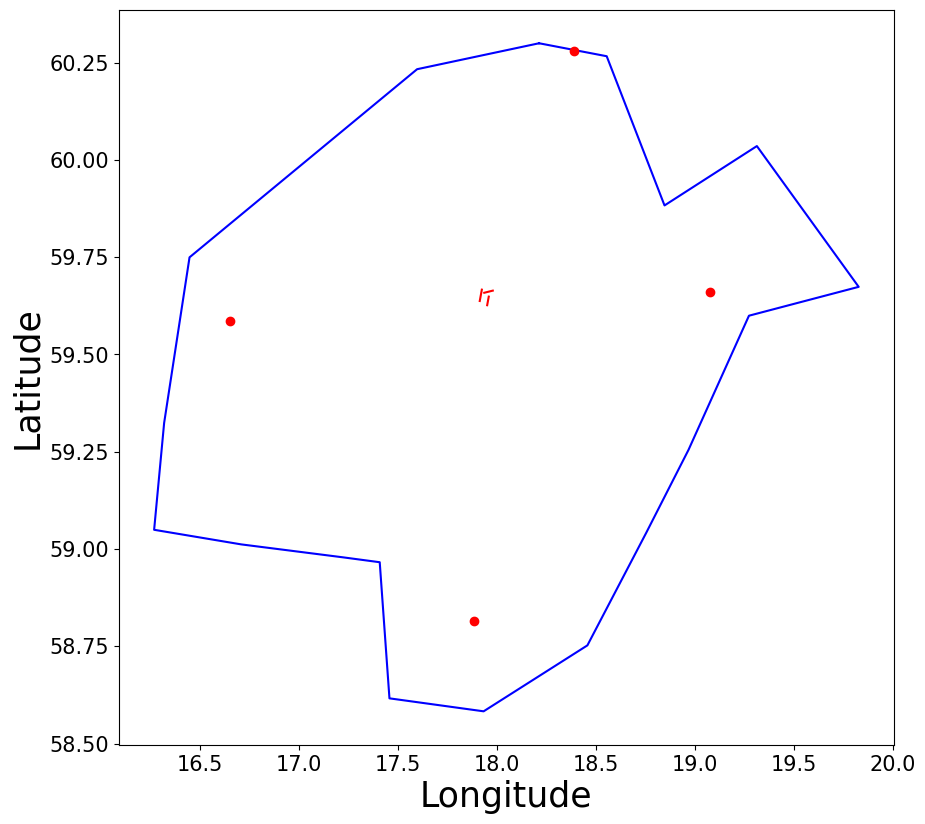

In [3]:
plot_TMA()

In [4]:
 def plot_horizontal_profile(df, linewidth=1):
    
    plot_TMA()
    
    if df.empty:
        return
    
    for flight_id, flight_df in df.groupby(level='flightId'):
        #print(flight_id)
        flight_states_opensky_df = df.loc[(flight_id,), :]
        lons = flight_df["lon"]
        lats = flight_df["lat"]
        
        plt.plot(lons, lats, color='k', linewidth=linewidth)
        
    plt.title("temp")                   
    plt.savefig("temp.png")

# Data uploading

In [5]:
filename = "../Data/ESSA/2019/osn_ESSA_tracks_2019/osn_arrival_ESSA_tracks_2019_10_week5.csv"
tracks_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'origin', 'endDate', 'callsign', 'icao24', 'timestamp', 'lat', 'lon', 'baroAltitude'])
tracks_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(tracks_df.groupby(level='flightId')))

887


In [6]:
filename = "../Data/ESSA/2019/osn_ESSA_tracks_around250NM_2019/osn_arrival_ESSA_tracks_around250NM_2019_10_week5.csv"
tracks_around250_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'origin', 'endDate', 'callsign', 'icao24', 'timestamp', 'lat', 'lon', 'baroAltitude'])
tracks_around250_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(tracks_around250_df.groupby(level='flightId')))
filename = "../Data/ESSA/2019/osn_ESSA_tracks_around50NM_2019/osn_arrival_ESSA_tracks_around50NM_2019_10_week5.csv"
tracks_around50_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'origin', 'endDate', 'callsign', 'icao24', 'timestamp', 'lat', 'lon', 'baroAltitude'])
tracks_around50_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(tracks_around50_df.groupby(level='flightId')))

886
883


In [7]:
filename = "../Data/ESSA/2019/osn_ESSA_states_around250NM_2019_downloaded/osn_arrival_ESSA_states_around250NM_2019_10_week5.csv"
states_extracted_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_extracted_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_extracted_df.groupby(level='flightId')))
filename = "../Data/ESSA/2019/osn_ESSA_states_around50NM_2019_downloaded/osn_arrival_ESSA_states_around50NM_2019_10_week5.csv"
states_extracted_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_extracted_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_extracted_df.groupby(level='flightId')))

880
877


In [8]:
filename = "../Data/ESSA/2019/osn_ESSA_states_250NM_2019_extracted/osn_arrival_ESSA_states_250NM_extracted_2019_10_week5.csv"
states_extracted_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_extracted_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_extracted_df.groupby(level='flightId')))
filename = "../Data/ESSA/2019/osn_ESSA_states_50NM_2019_extracted/osn_arrival_ESSA_states_50NM_extracted_2019_10_week5.csv"
states_extracted_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_extracted_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_extracted_df.groupby(level='flightId')))

880
877


In [9]:
filename = "../Data/ESSA/2019/osn_ESSA_states_250NM_2019_filtered_by_callsign/osn_arrival_ESSA_states_250NM_filtered_2019_10_week5.csv"
states_filtered_by_callsign_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_filtered_by_callsign_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_filtered_by_callsign_df.groupby(level='flightId')))
filename = "../Data/ESSA/2019/osn_ESSA_states_50NM_2019_filtered_by_callsign/osn_arrival_ESSA_states_50NM_filtered_2019_10_week5.csv"
states_filtered_by_callsign_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_filtered_by_callsign_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_filtered_by_callsign_df.groupby(level='flightId')))

875
872


In [10]:
filename = "../Data/ESSA/2019/osn_ESSA_states_250NM_2019_smoothed/osn_arrival_ESSA_states_250NM_smoothed_2019_10_week5.csv"
states_smoothed_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_smoothed_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_smoothed_df.groupby(level='flightId')))
filename = "../Data/ESSA/2019/osn_ESSA_states_50NM_2019_smoothed/osn_arrival_ESSA_states_50NM_smoothed_2019_10_week5.csv"
states_smoothed_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_smoothed_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_smoothed_df.groupby(level='flightId')))

875
872


In [11]:
filename = "../Data/ESSA/2019/osn_ESSA_states_250NM_2019_filtered_by_altitude/osn_arrival_ESSA_states_250NM_2019_10_week5.csv"
states_filtered_by_altitude_df1 = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_filtered_by_altitude_df1.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_filtered_by_altitude_df1.groupby(level='flightId')))
filename = "../Data/ESSA/2019/osn_ESSA_states_50NM_2019_filtered_by_altitude/osn_arrival_ESSA_states_50NM_2019_10_week5.csv"
states_filtered_by_altitude_df2 = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_filtered_by_altitude_df2.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_filtered_by_altitude_df2.groupby(level='flightId')))

854
857


In [12]:
filename = "../Data/ESSA/2019/osn_ESSA_states_250NM_2019_filtered_by_latitude/osn_arrival_ESSA_states_250NM_2019_10_week5.csv"
states_filtered_by_latitude_df1 = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_filtered_by_latitude_df1.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_filtered_by_latitude_df1.groupby(level='flightId')))
filename = "../Data/ESSA/2019/osn_ESSA_states_50NM_2019_filtered_by_latitude/osn_arrival_ESSA_states_50NM_2019_10_week5.csv"
states_filtered_by_latitude_df2 = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_filtered_by_latitude_df2.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_filtered_by_latitude_df2.groupby(level='flightId')))

827
856


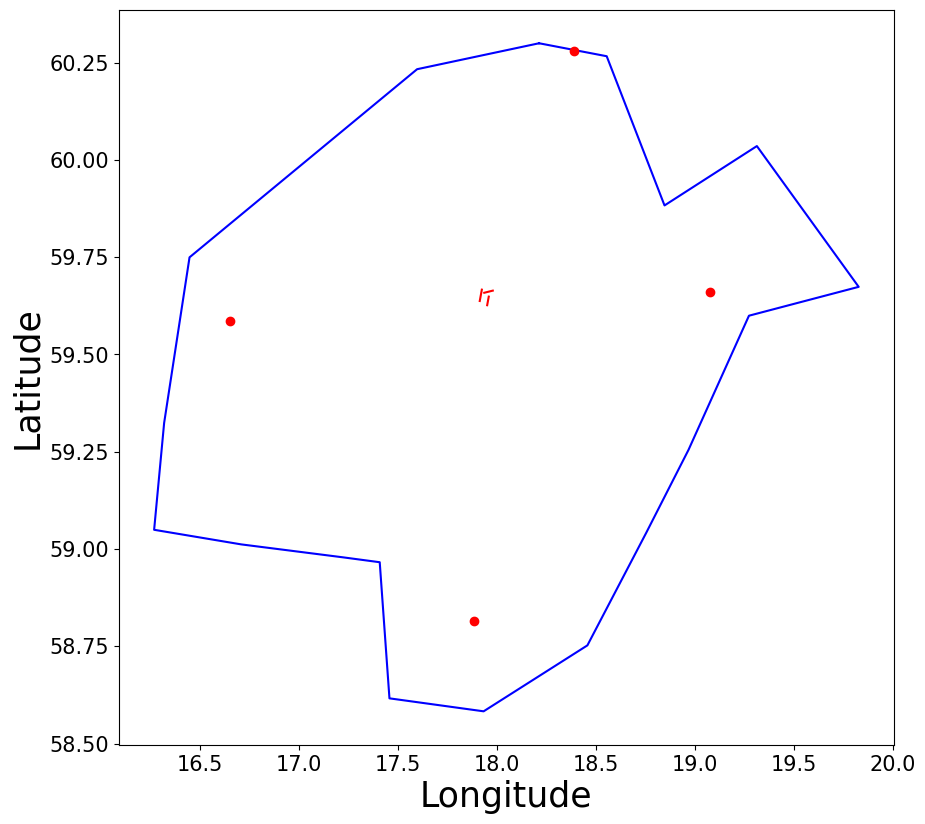

In [13]:
flight_df = states_filtered_by_latitude_df1[states_filtered_by_latitude_df1.index.get_level_values('flightId') == '191031SAS749']
plot_horizontal_profile(flight_df)

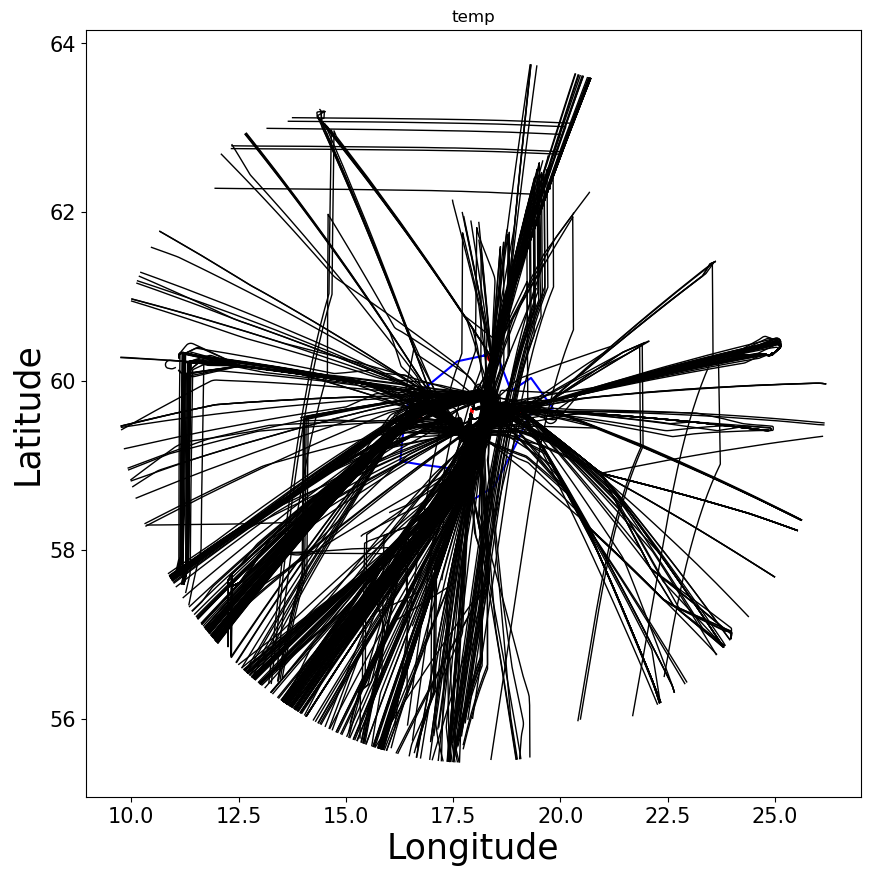

In [14]:
plot_horizontal_profile(states_filtered_by_latitude_df1)

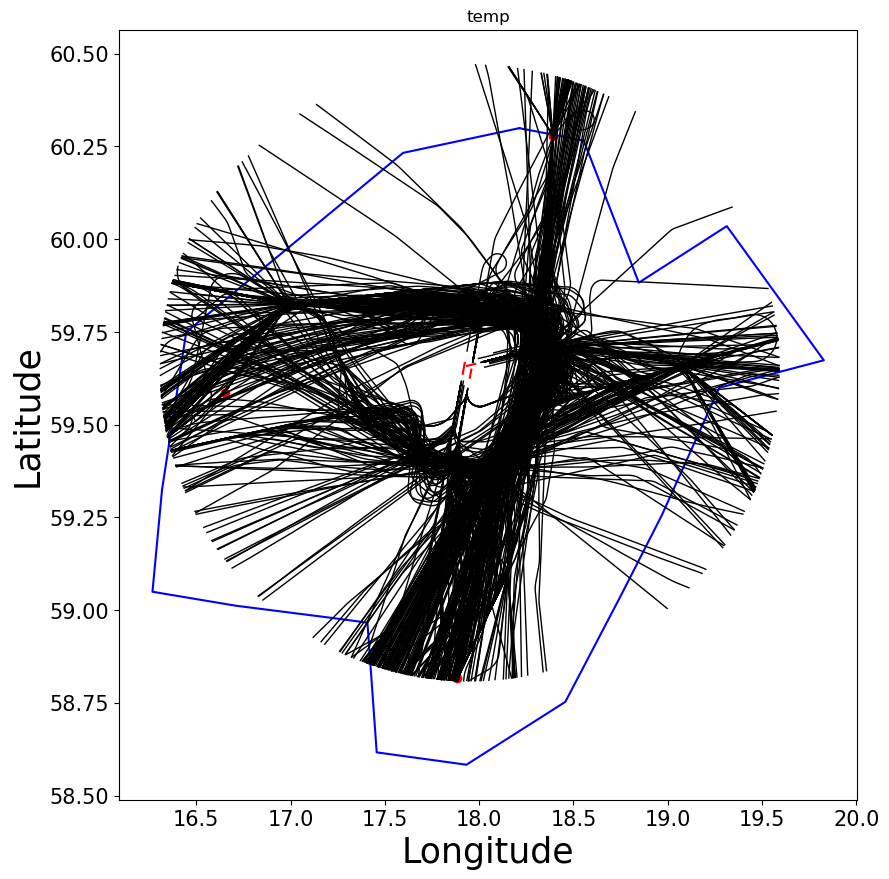

In [15]:
plot_horizontal_profile(states_filtered_by_latitude_df2)